**Mounting Google Drive :**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Extracting Data
!unzip "/content/drive/MyDrive/Final Year Project/Diabetic Retinopathy /data_sets.zip"

Archive:  /content/drive/MyDrive/Final Year Project/Diabetic Retinopathy /data_sets.zip
   creating: data_sets/
   creating: data_sets/test/
  inflating: data_sets/test/20060530_53455_0100_PP.png  
  inflating: data_sets/test/2132_right.jpeg  
  inflating: data_sets/test/294_left.jpeg  
  inflating: data_sets/test/406_left.jpeg  
  inflating: data_sets/test/download.jpg  
   creating: data_sets/train/
   creating: data_sets/train/moderate/
  inflating: data_sets/train/moderate/20051020_44349_0100_PP - Copy.png  
  inflating: data_sets/train/moderate/20051020_44349_0100_PP.png  
  inflating: data_sets/train/moderate/20051020_57622_0100_PP.png  
  inflating: data_sets/train/moderate/20051020_64570_0100_PP - Copy.png  
  inflating: data_sets/train/moderate/20051020_64570_0100_PP.png  
  inflating: data_sets/train/moderate/20051021_39314_0100_PP.png  
  inflating: data_sets/train/moderate/20051021_59136_0100_PP.png  
  inflating: data_sets/train/moderate/20051202_54611_0400_PP.png  
  infl

##Image Augmentation / Preprocessing :

In [3]:
#Import req. Lib.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
#Augmentation On Training Variable
train_datagen = ImageDataGenerator(rescale= 1./255,
                 zoom_range=0.2,
                 horizontal_flip =True)

In [5]:
#Augmentation On Testing Variable
test_datagen = ImageDataGenerator(rescale= 1./255)

In [6]:
#Augmentation On Training Variable
ftrain = train_datagen.flow_from_directory('/content/data_sets/train',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 1072 images belonging to 4 classes.


In [7]:
#Augmentation On Testing Variable
ftest = test_datagen.flow_from_directory('/content/data_sets/test',
                                          target_size=(64,64),
                                          class_mode='categorical',
                                          batch_size=100)

Found 0 images belonging to 0 classes.


##Model Building :

In [8]:
#Import req. Lib.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [9]:
# Build a CNN Block:
model = Sequential() #intializing sequential model
model.add(Convolution2D(32,(3,3),activation='relu', input_shape=(64,64,3))) #convolution layer
model.add(MaxPooling2D(pool_size=(2, 2))) #Maxpooling layer
model.add(Flatten()) #Flatten layer
model.add(Dense(400,activation='relu')) #Hidden Layer 1
model.add(Dense(200,activation='relu')) #Hidden Layer 2
model.add(Dense(4,activation='softmax')) #Output Layer

Compiling :

In [10]:
# Compiling The Model...
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Fit / Train The Model :

In [11]:
#Train Model:
model.fit_generator(ftrain,
                    steps_per_epoch=len(ftrain),
                    epochs=10,
                    validation_data=ftest,
                    validation_steps=len(ftest))

<ipython-input-11-b1d0f612b212>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(ftrain,


Epoch 1/10
11/11 [==============================] - 14s 377ms/step - loss: 2.5872 - accuracy: 0.2938
Epoch 2/10
11/11 [==============================] - 4s 319ms/step - loss: 1.3486 - accuracy: 0.3517
Epoch 3/10
11/11 [==============================] - 5s 449ms/step - loss: 1.0818 - accuracy: 0.6017
Epoch 4/10
11/11 [==============================] - 4s 325ms/step - loss: 0.8958 - accuracy: 0.6903
Epoch 5/10
11/11 [==============================] - 4s 321ms/step - loss: 0.7726 - accuracy: 0.7090
Epoch 6/10
11/11 [==============================] - 4s 390ms/step - loss: 0.6884 - accuracy: 0.7369
Epoch 7/10
11/11 [==============================] - 4s 365ms/step - loss: 0.5920 - accuracy: 0.7771
Epoch 8/10
11/11 [==============================] - 4s 325ms/step - loss: 0.5784 - accuracy: 0.7976
Epoch 9/10
11/11 [==============================] - 4s 350ms/step - loss: 0.5796 - accuracy: 0.7715
Epoch 10/10
11/11 [==============================] - 5s 411ms/step - loss: 0.5347 - accuracy: 0.778

Saving The Model :

In [ ]:
#Save Model
model.save('DRP.h5')

##Testing The Model :

In [12]:
#Import req. Lib.
from tensorflow.keras.preprocessing import image
import numpy as np

In [13]:
#Testing No 1 :-
img = image.load_img('/content/data_sets/test/20060530_53455_0100_PP.png',target_size=(64,64)) #Reading image
f = image.img_to_array(img) #Convertinng image to array
f = np.expand_dims(f,axis=0) #Expanding dimensions
pred = np.argmax(model.predict(f)) #predicting higher propability index
op = ['Moderate diabetic_retinopathy',' No diabetic_retinopathy',' Proliferate diabetic_retinopathy',' Severe diabetic_retinopathy'] #Creating List
op[pred] #List indexing with output

1/1 [==============================] - 0s 127ms/step


' No diabetic_retinopathy'

In [14]:
#Testing No 2 :-
img = image.load_img('/content/data_sets/test/294_left.jpeg',target_size=(64,64)) #Reading image
f = image.img_to_array(img) #Convertinng image to array
f = np.expand_dims(f,axis=0) #Expanding dimensions
pred = np.argmax(model.predict(f)) #predicting higher propability index
op = ['Moderate diabetic_retinopathy',' No diabetic_retinopathy',' Proliferate diabetic_retinopathy',' Severe diabetic_retinopathy'] #Creating List
op[pred] #List indexing with output

1/1 [==============================] - 0s 19ms/step


' Severe diabetic_retinopathy'

In [15]:
#Testing No 3 :-
img = image.load_img('/content/data_sets/test/2132_right.jpeg',target_size=(64,64)) #Reading image
f = image.img_to_array(img) #Convertinng image to array
f = np.expand_dims(f,axis=0) #Expanding dimensions
pred = np.argmax(model.predict(f)) #predicting higher propability index
op = ['Moderate diabetic_retinopathy',' No diabetic_retinopathy',' Proliferate diabetic_retinopathy',' Severe diabetic_retinopathy'] #Creating List
op[pred] #List indexing with output

1/1 [==============================] - 0s 19ms/step


' Proliferate diabetic_retinopathy'

In [16]:
#Testing No 4 :-
img = image.load_img('/content/data_sets/test/download.jpg',target_size=(64,64)) #Reading image
f = image.img_to_array(img) #Convertinng image to array
f = np.expand_dims(f,axis=0) #Expanding dimensions
pred = np.argmax(model.predict(f)) #predicting higher propability index
op = ['Moderate diabetic_retinopathy',' No diabetic_retinopathy',' Proliferate diabetic_retinopathy',' Severe diabetic_retinopathy'] #Creating List
op[pred] #List indexing with output

1/1 [==============================] - 0s 21ms/step


' No diabetic_retinopathy'

##Model Tuning:

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [18]:
early_stop = EarlyStopping(monitor='val_accuracy', 
                           patience=5)

lr = ReduceLROnPlateau(monitor='val_accuaracy', 
                       factor=0.5, 
                       min_lr=0.00001)

callback = [early_stop,lr]

In [23]:
#Train model
history = model.fit_generator(ftrain,
                    steps_per_epoch=len(ftrain),
                    epochs=100,
                    callbacks=callback,
                    validation_data=ftest,
                    validation_steps=len(ftest))

<ipython-input-23-9dd48b270f61>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(ftrain,


Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 0.1159 - accuracy: 0.9524

11/11 [==============================] - 5s 452ms/step - loss: 0.1159 - accuracy: 0.9524 - lr: 0.0010
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 0.1232 - accuracy: 0.9468

11/11 [==============================] - 4s 321ms/step - loss: 0.1232 - accuracy: 0.9468 - lr: 0.0010
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 0.1413 - accuracy: 0.9450

11/11 [==============================] - 4s 323ms/step - loss: 0.1413 - accuracy: 0.9450 - lr: 0.0010
Epoch 4/100
11/11 [==============================] - ETA: 0s - loss: 0.1074 - accuracy: 0.9655

11/11 [==============================] - 5s 444ms/step - loss: 0.1074 - accuracy: 0.9655 - lr: 0.0010
Epoch 5/100
11/11 [==============================] - ETA: 0s - loss: 0.1060 - accuracy: 0.9562

11/11 [==============================] - 4s 335ms/step - loss: 0.1060 - accuracy: 0.9562 - lr: 0.0010
Epoch 6/100
11/11 [==============================] - ETA: 0s - loss: 0.1094 - accuracy: 0.9524

11/11 [==============================] - 4s 326ms/step - loss: 0.1094 - accuracy: 0.9524 - lr: 0.0010
Epoch 7/100
11/11 [==============================] - ETA: 0s - loss: 0.0875 - accuracy: 0.9664

11/11 [==============================] - 4s 365ms/step - loss: 0.0875 - accuracy: 0.9664 - lr: 0.0010
Epoch 8/100
11/11 [==============================] - ETA: 0s - loss: 0.0966 - accuracy: 0.9664

11/11 [==============================] - 5s 399ms/step - loss: 0.0966 - accuracy: 0.9664 - lr: 0.0010
Epoch 9/100
11/11 [==============================] - ETA: 0s - loss: 0.0915 - accuracy: 0.9674

11/11 [==============================] - 4s 331ms/step - loss: 0.0915 - accuracy: 0.9674 - lr: 0.0010
Epoch 10/100
11/11 [==============================] - ETA: 0s - loss: 0.0846 - accuracy: 0.9664

11/11 [==============================] - 4s 319ms/step - loss: 0.0846 - accuracy: 0.9664 - lr: 0.0010
Epoch 11/100
11/11 [==============================] - ETA: 0s - loss: 0.1067 - accuracy: 0.9580

11/11 [==============================] - 5s 450ms/step - loss: 0.1067 - accuracy: 0.9580 - lr: 0.0010
Epoch 12/100
11/11 [==============================] - ETA: 0s - loss: 0.1005 - accuracy: 0.9599

11/11 [==============================] - 4s 323ms/step - loss: 0.1005 - accuracy: 0.9599 - lr: 0.0010
Epoch 13/100
11/11 [==============================] - ETA: 0s - loss: 0.0933 - accuracy: 0.9608

11/11 [==============================] - 4s 333ms/step - loss: 0.0933 - accuracy: 0.9608 - lr: 0.0010
Epoch 14/100
11/11 [==============================] - ETA: 0s - loss: 0.0901 - accuracy: 0.9711

11/11 [==============================] - 5s 457ms/step - loss: 0.0901 - accuracy: 0.9711 - lr: 0.0010
Epoch 15/100
11/11 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9590

11/11 [==============================] - 4s 324ms/step - loss: 0.1183 - accuracy: 0.9590 - lr: 0.0010
Epoch 16/100
11/11 [==============================] - ETA: 0s - loss: 0.0910 - accuracy: 0.9627

11/11 [==============================] - 4s 334ms/step - loss: 0.0910 - accuracy: 0.9627 - lr: 0.0010
Epoch 17/100
11/11 [==============================] - ETA: 0s - loss: 0.0932 - accuracy: 0.9618

11/11 [==============================] - 5s 452ms/step - loss: 0.0932 - accuracy: 0.9618 - lr: 0.0010
Epoch 18/100
11/11 [==============================] - ETA: 0s - loss: 0.1078 - accuracy: 0.9506

11/11 [==============================] - 4s 327ms/step - loss: 0.1078 - accuracy: 0.9506 - lr: 0.0010
Epoch 19/100
11/11 [==============================] - ETA: 0s - loss: 0.0849 - accuracy: 0.9636

11/11 [==============================] - 4s 326ms/step - loss: 0.0849 - accuracy: 0.9636 - lr: 0.0010
Epoch 20/100
11/11 [==============================] - ETA: 0s - loss: 0.0934 - accuracy: 0.9636

11/11 [==============================] - 4s 394ms/step - loss: 0.0934 - accuracy: 0.9636 - lr: 0.0010
Epoch 21/100
11/11 [==============================] - ETA: 0s - loss: 0.0811 - accuracy: 0.9729

11/11 [==============================] - 4s 329ms/step - loss: 0.0811 - accuracy: 0.9729 - lr: 0.0010
Epoch 22/100
11/11 [==============================] - ETA: 0s - loss: 0.0917 - accuracy: 0.9664

11/11 [==============================] - 4s 318ms/step - loss: 0.0917 - accuracy: 0.9664 - lr: 0.0010
Epoch 23/100
11/11 [==============================] - ETA: 0s - loss: 0.0949 - accuracy: 0.9608

11/11 [==============================] - 4s 353ms/step - loss: 0.0949 - accuracy: 0.9608 - lr: 0.0010
Epoch 24/100
11/11 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9599

11/11 [==============================] - 5s 423ms/step - loss: 0.0989 - accuracy: 0.9599 - lr: 0.0010
Epoch 25/100
11/11 [==============================] - ETA: 0s - loss: 0.1015 - accuracy: 0.9608

11/11 [==============================] - 4s 336ms/step - loss: 0.1015 - accuracy: 0.9608 - lr: 0.0010
Epoch 26/100
11/11 [==============================] - ETA: 0s - loss: 0.0704 - accuracy: 0.9739

11/11 [==============================] - 9s 867ms/step - loss: 0.0704 - accuracy: 0.9739 - lr: 0.0010
Epoch 27/100
11/11 [==============================] - ETA: 0s - loss: 0.0954 - accuracy: 0.9552

11/11 [==============================] - 4s 337ms/step - loss: 0.0954 - accuracy: 0.9552 - lr: 0.0010
Epoch 28/100
11/11 [==============================] - ETA: 0s - loss: 0.1160 - accuracy: 0.9487

11/11 [==============================] - 4s 324ms/step - loss: 0.1160 - accuracy: 0.9487 - lr: 0.0010
Epoch 29/100
11/11 [==============================] - ETA: 0s - loss: 0.0680 - accuracy: 0.9767

11/11 [==============================] - 5s 453ms/step - loss: 0.0680 - accuracy: 0.9767 - lr: 0.0010
Epoch 30/100
11/11 [==============================] - ETA: 0s - loss: 0.0908 - accuracy: 0.9692

11/11 [==============================] - 4s 409ms/step - loss: 0.0908 - accuracy: 0.9692 - lr: 0.0010
Epoch 31/100
11/11 [==============================] - ETA: 0s - loss: 0.1270 - accuracy: 0.9562

11/11 [==============================] - 5s 455ms/step - loss: 0.1270 - accuracy: 0.9562 - lr: 0.0010
Epoch 32/100
11/11 [==============================] - ETA: 0s - loss: 0.1131 - accuracy: 0.9534

11/11 [==============================] - 5s 428ms/step - loss: 0.1131 - accuracy: 0.9534 - lr: 0.0010
Epoch 33/100
11/11 [==============================] - ETA: 0s - loss: 0.0889 - accuracy: 0.9646

11/11 [==============================] - 4s 335ms/step - loss: 0.0889 - accuracy: 0.9646 - lr: 0.0010
Epoch 34/100
11/11 [==============================] - ETA: 0s - loss: 0.1040 - accuracy: 0.9552

11/11 [==============================] - 4s 334ms/step - loss: 0.1040 - accuracy: 0.9552 - lr: 0.0010
Epoch 35/100
11/11 [==============================] - ETA: 0s - loss: 0.1077 - accuracy: 0.9580

11/11 [==============================] - 5s 437ms/step - loss: 0.1077 - accuracy: 0.9580 - lr: 0.0010
Epoch 36/100
11/11 [==============================] - ETA: 0s - loss: 0.0822 - accuracy: 0.9739

11/11 [==============================] - 4s 327ms/step - loss: 0.0822 - accuracy: 0.9739 - lr: 0.0010
Epoch 37/100
11/11 [==============================] - ETA: 0s - loss: 0.0957 - accuracy: 0.9664

11/11 [==============================] - 4s 326ms/step - loss: 0.0957 - accuracy: 0.9664 - lr: 0.0010
Epoch 38/100
11/11 [==============================] - ETA: 0s - loss: 0.0716 - accuracy: 0.9720

11/11 [==============================] - 5s 432ms/step - loss: 0.0716 - accuracy: 0.9720 - lr: 0.0010
Epoch 39/100
11/11 [==============================] - ETA: 0s - loss: 0.0787 - accuracy: 0.9711

11/11 [==============================] - 4s 319ms/step - loss: 0.0787 - accuracy: 0.9711 - lr: 0.0010
Epoch 40/100
11/11 [==============================] - ETA: 0s - loss: 0.0921 - accuracy: 0.9608

11/11 [==============================] - 4s 335ms/step - loss: 0.0921 - accuracy: 0.9608 - lr: 0.0010
Epoch 41/100
11/11 [==============================] - ETA: 0s - loss: 0.0885 - accuracy: 0.9664

11/11 [==============================] - 6s 554ms/step - loss: 0.0885 - accuracy: 0.9664 - lr: 0.0010
Epoch 42/100
11/11 [==============================] - ETA: 0s - loss: 0.0722 - accuracy: 0.9739

11/11 [==============================] - 4s 325ms/step - loss: 0.0722 - accuracy: 0.9739 - lr: 0.0010
Epoch 43/100
11/11 [==============================] - ETA: 0s - loss: 0.1004 - accuracy: 0.9646

11/11 [==============================] - 6s 528ms/step - loss: 0.1004 - accuracy: 0.9646 - lr: 0.0010
Epoch 44/100
11/11 [==============================] - ETA: 0s - loss: 0.0958 - accuracy: 0.9580

11/11 [==============================] - 4s 326ms/step - loss: 0.0958 - accuracy: 0.9580 - lr: 0.0010
Epoch 45/100
11/11 [==============================] - ETA: 0s - loss: 0.0724 - accuracy: 0.9720

11/11 [==============================] - 4s 323ms/step - loss: 0.0724 - accuracy: 0.9720 - lr: 0.0010
Epoch 46/100
11/11 [==============================] - ETA: 0s - loss: 0.0688 - accuracy: 0.9711

11/11 [==============================] - 4s 390ms/step - loss: 0.0688 - accuracy: 0.9711 - lr: 0.0010
Epoch 47/100
11/11 [==============================] - ETA: 0s - loss: 0.0843 - accuracy: 0.9636

11/11 [==============================] - 4s 322ms/step - loss: 0.0843 - accuracy: 0.9636 - lr: 0.0010
Epoch 48/100
11/11 [==============================] - ETA: 0s - loss: 0.0718 - accuracy: 0.9729

11/11 [==============================] - 4s 319ms/step - loss: 0.0718 - accuracy: 0.9729 - lr: 0.0010
Epoch 49/100
11/11 [==============================] - ETA: 0s - loss: 0.0814 - accuracy: 0.9674

11/11 [==============================] - 4s 343ms/step - loss: 0.0814 - accuracy: 0.9674 - lr: 0.0010
Epoch 50/100
11/11 [==============================] - ETA: 0s - loss: 0.0966 - accuracy: 0.9636

11/11 [==============================] - 5s 419ms/step - loss: 0.0966 - accuracy: 0.9636 - lr: 0.0010
Epoch 51/100
11/11 [==============================] - ETA: 0s - loss: 0.0867 - accuracy: 0.9646

11/11 [==============================] - 4s 325ms/step - loss: 0.0867 - accuracy: 0.9646 - lr: 0.0010
Epoch 52/100
11/11 [==============================] - ETA: 0s - loss: 0.0689 - accuracy: 0.9739

11/11 [==============================] - 4s 323ms/step - loss: 0.0689 - accuracy: 0.9739 - lr: 0.0010
Epoch 53/100
11/11 [==============================] - ETA: 0s - loss: 0.0608 - accuracy: 0.9804

11/11 [==============================] - 5s 451ms/step - loss: 0.0608 - accuracy: 0.9804 - lr: 0.0010
Epoch 54/100
11/11 [==============================] - ETA: 0s - loss: 0.0774 - accuracy: 0.9683

11/11 [==============================] - 4s 323ms/step - loss: 0.0774 - accuracy: 0.9683 - lr: 0.0010
Epoch 55/100
11/11 [==============================] - ETA: 0s - loss: 0.0741 - accuracy: 0.9692

11/11 [==============================] - 4s 332ms/step - loss: 0.0741 - accuracy: 0.9692 - lr: 0.0010
Epoch 56/100
11/11 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9757

11/11 [==============================] - 4s 413ms/step - loss: 0.0686 - accuracy: 0.9757 - lr: 0.0010
Epoch 57/100
11/11 [==============================] - ETA: 0s - loss: 0.0636 - accuracy: 0.9748

11/11 [==============================] - 4s 334ms/step - loss: 0.0636 - accuracy: 0.9748 - lr: 0.0010
Epoch 58/100
11/11 [==============================] - ETA: 0s - loss: 0.0629 - accuracy: 0.9804

11/11 [==============================] - 4s 321ms/step - loss: 0.0629 - accuracy: 0.9804 - lr: 0.0010
Epoch 59/100
11/11 [==============================] - ETA: 0s - loss: 0.0728 - accuracy: 0.9711

11/11 [==============================] - 4s 359ms/step - loss: 0.0728 - accuracy: 0.9711 - lr: 0.0010
Epoch 60/100
11/11 [==============================] - ETA: 0s - loss: 0.0748 - accuracy: 0.9683

11/11 [==============================] - 5s 408ms/step - loss: 0.0748 - accuracy: 0.9683 - lr: 0.0010
Epoch 61/100
11/11 [==============================] - ETA: 0s - loss: 0.0629 - accuracy: 0.9785

11/11 [==============================] - 4s 329ms/step - loss: 0.0629 - accuracy: 0.9785 - lr: 0.0010
Epoch 62/100
11/11 [==============================] - ETA: 0s - loss: 0.0594 - accuracy: 0.9767

11/11 [==============================] - 4s 325ms/step - loss: 0.0594 - accuracy: 0.9767 - lr: 0.0010
Epoch 63/100
11/11 [==============================] - ETA: 0s - loss: 0.0867 - accuracy: 0.9655

11/11 [==============================] - 5s 407ms/step - loss: 0.0867 - accuracy: 0.9655 - lr: 0.0010
Epoch 64/100
11/11 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.9701

11/11 [==============================] - 4s 324ms/step - loss: 0.0706 - accuracy: 0.9701 - lr: 0.0010
Epoch 65/100
11/11 [==============================] - ETA: 0s - loss: 0.0693 - accuracy: 0.9748

11/11 [==============================] - 4s 375ms/step - loss: 0.0693 - accuracy: 0.9748 - lr: 0.0010
Epoch 66/100
11/11 [==============================] - ETA: 0s - loss: 0.0669 - accuracy: 0.9701

11/11 [==============================] - 4s 332ms/step - loss: 0.0669 - accuracy: 0.9701 - lr: 0.0010
Epoch 67/100
11/11 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.9776

11/11 [==============================] - 4s 322ms/step - loss: 0.0620 - accuracy: 0.9776 - lr: 0.0010
Epoch 68/100
11/11 [==============================] - ETA: 0s - loss: 0.0717 - accuracy: 0.9683

11/11 [==============================] - 4s 344ms/step - loss: 0.0717 - accuracy: 0.9683 - lr: 0.0010
Epoch 69/100
11/11 [==============================] - ETA: 0s - loss: 0.0931 - accuracy: 0.9590

11/11 [==============================] - 4s 344ms/step - loss: 0.0931 - accuracy: 0.9590 - lr: 0.0010
Epoch 70/100
11/11 [==============================] - ETA: 0s - loss: 0.0863 - accuracy: 0.9692

11/11 [==============================] - 4s 325ms/step - loss: 0.0863 - accuracy: 0.9692 - lr: 0.0010
Epoch 71/100
11/11 [==============================] - ETA: 0s - loss: 0.0947 - accuracy: 0.9636

11/11 [==============================] - 4s 388ms/step - loss: 0.0947 - accuracy: 0.9636 - lr: 0.0010
Epoch 72/100
11/11 [==============================] - ETA: 0s - loss: 0.1340 - accuracy: 0.9478

11/11 [==============================] - 4s 371ms/step - loss: 0.1340 - accuracy: 0.9478 - lr: 0.0010
Epoch 73/100
11/11 [==============================] - ETA: 0s - loss: 0.0704 - accuracy: 0.9701

11/11 [==============================] - 4s 325ms/step - loss: 0.0704 - accuracy: 0.9701 - lr: 0.0010
Epoch 74/100
11/11 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.9739

11/11 [==============================] - 4s 326ms/step - loss: 0.0620 - accuracy: 0.9739 - lr: 0.0010
Epoch 75/100
11/11 [==============================] - ETA: 0s - loss: 0.0684 - accuracy: 0.9757

11/11 [==============================] - 4s 376ms/step - loss: 0.0684 - accuracy: 0.9757 - lr: 0.0010
Epoch 76/100
11/11 [==============================] - ETA: 0s - loss: 0.0728 - accuracy: 0.9739

11/11 [==============================] - 4s 322ms/step - loss: 0.0728 - accuracy: 0.9739 - lr: 0.0010
Epoch 77/100
11/11 [==============================] - ETA: 0s - loss: 0.0704 - accuracy: 0.9739

11/11 [==============================] - 4s 324ms/step - loss: 0.0704 - accuracy: 0.9739 - lr: 0.0010
Epoch 78/100
11/11 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.9832

11/11 [==============================] - 5s 454ms/step - loss: 0.0603 - accuracy: 0.9832 - lr: 0.0010
Epoch 79/100
11/11 [==============================] - ETA: 0s - loss: 0.0735 - accuracy: 0.9729

11/11 [==============================] - 4s 328ms/step - loss: 0.0735 - accuracy: 0.9729 - lr: 0.0010
Epoch 80/100
11/11 [==============================] - ETA: 0s - loss: 0.0572 - accuracy: 0.9757

11/11 [==============================] - 4s 323ms/step - loss: 0.0572 - accuracy: 0.9757 - lr: 0.0010
Epoch 81/100
11/11 [==============================] - ETA: 0s - loss: 0.0642 - accuracy: 0.9757

11/11 [==============================] - 5s 461ms/step - loss: 0.0642 - accuracy: 0.9757 - lr: 0.0010
Epoch 82/100
11/11 [==============================] - ETA: 0s - loss: 0.0756 - accuracy: 0.9701

11/11 [==============================] - 4s 336ms/step - loss: 0.0756 - accuracy: 0.9701 - lr: 0.0010
Epoch 83/100
11/11 [==============================] - ETA: 0s - loss: 0.0586 - accuracy: 0.9823

11/11 [==============================] - 4s 327ms/step - loss: 0.0586 - accuracy: 0.9823 - lr: 0.0010
Epoch 84/100
11/11 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9776

11/11 [==============================] - 4s 382ms/step - loss: 0.0536 - accuracy: 0.9776 - lr: 0.0010
Epoch 85/100
11/11 [==============================] - ETA: 0s - loss: 0.0489 - accuracy: 0.9851

11/11 [==============================] - 4s 327ms/step - loss: 0.0489 - accuracy: 0.9851 - lr: 0.0010
Epoch 86/100
11/11 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9888

11/11 [==============================] - 4s 331ms/step - loss: 0.0442 - accuracy: 0.9888 - lr: 0.0010
Epoch 87/100
11/11 [==============================] - ETA: 0s - loss: 0.0483 - accuracy: 0.9804

11/11 [==============================] - 4s 354ms/step - loss: 0.0483 - accuracy: 0.9804 - lr: 0.0010
Epoch 88/100
11/11 [==============================] - ETA: 0s - loss: 0.0437 - accuracy: 0.9851

11/11 [==============================] - 4s 340ms/step - loss: 0.0437 - accuracy: 0.9851 - lr: 0.0010
Epoch 89/100
11/11 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9869

11/11 [==============================] - 4s 331ms/step - loss: 0.0367 - accuracy: 0.9869 - lr: 0.0010
Epoch 90/100
11/11 [==============================] - ETA: 0s - loss: 0.0611 - accuracy: 0.9739

11/11 [==============================] - 4s 333ms/step - loss: 0.0611 - accuracy: 0.9739 - lr: 0.0010
Epoch 91/100
11/11 [==============================] - ETA: 0s - loss: 0.0559 - accuracy: 0.9776

11/11 [==============================] - 5s 421ms/step - loss: 0.0559 - accuracy: 0.9776 - lr: 0.0010
Epoch 92/100
11/11 [==============================] - ETA: 0s - loss: 0.0715 - accuracy: 0.9823

11/11 [==============================] - 4s 325ms/step - loss: 0.0715 - accuracy: 0.9823 - lr: 0.0010
Epoch 93/100
11/11 [==============================] - ETA: 0s - loss: 0.0558 - accuracy: 0.9776

11/11 [==============================] - 4s 324ms/step - loss: 0.0558 - accuracy: 0.9776 - lr: 0.0010
Epoch 94/100
11/11 [==============================] - ETA: 0s - loss: 0.0468 - accuracy: 0.9804

11/11 [==============================] - 5s 430ms/step - loss: 0.0468 - accuracy: 0.9804 - lr: 0.0010
Epoch 95/100
11/11 [==============================] - ETA: 0s - loss: 0.0792 - accuracy: 0.9636

11/11 [==============================] - 4s 323ms/step - loss: 0.0792 - accuracy: 0.9636 - lr: 0.0010
Epoch 96/100
11/11 [==============================] - ETA: 0s - loss: 0.0975 - accuracy: 0.9655

11/11 [==============================] - 4s 323ms/step - loss: 0.0975 - accuracy: 0.9655 - lr: 0.0010
Epoch 97/100
11/11 [==============================] - ETA: 0s - loss: 0.0894 - accuracy: 0.9692

11/11 [==============================] - 5s 448ms/step - loss: 0.0894 - accuracy: 0.9692 - lr: 0.0010
Epoch 98/100
11/11 [==============================] - ETA: 0s - loss: 0.0742 - accuracy: 0.9729

11/11 [==============================] - 4s 325ms/step - loss: 0.0742 - accuracy: 0.9729 - lr: 0.0010
Epoch 99/100
11/11 [==============================] - ETA: 0s - loss: 0.0620 - accuracy: 0.9757

11/11 [==============================] - 4s 325ms/step - loss: 0.0620 - accuracy: 0.9757 - lr: 0.0010
Epoch 100/100
11/11 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.9785

11/11 [==============================] - 5s 438ms/step - loss: 0.0538 - accuracy: 0.9785 - lr: 0.0010


##Diabetic Retina Types :

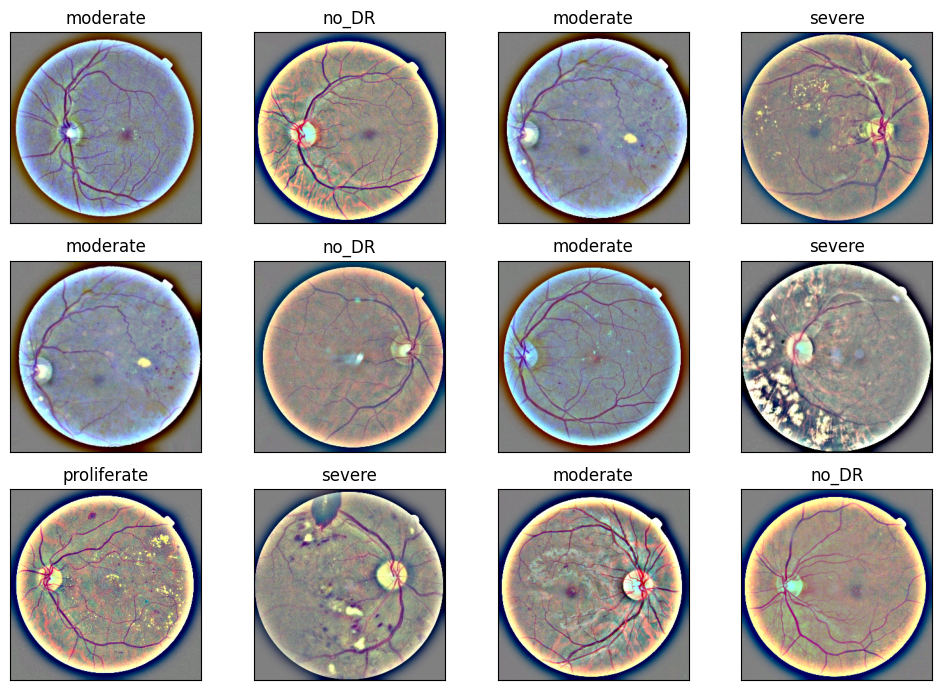

In [3]:
from IPython.display import Image
Image('/content/types of dia betic retina.png')

##Graph :

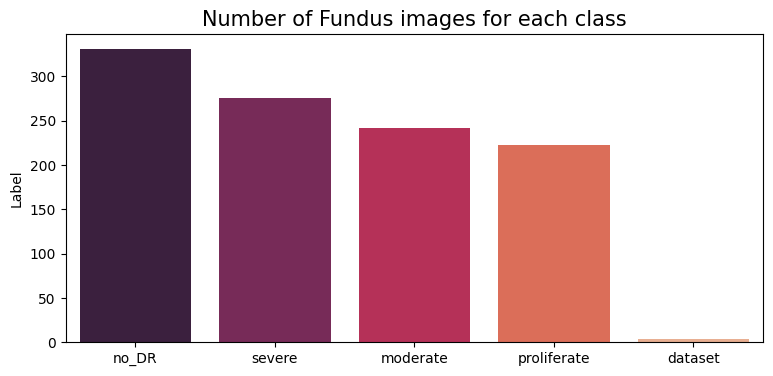

In [4]:
from IPython.display import Image
Image('/content/2.png')

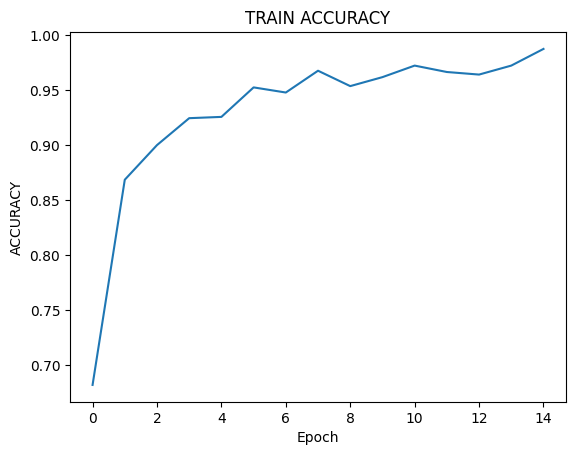

In [5]:
from IPython.display import Image
Image('/content/3.png')

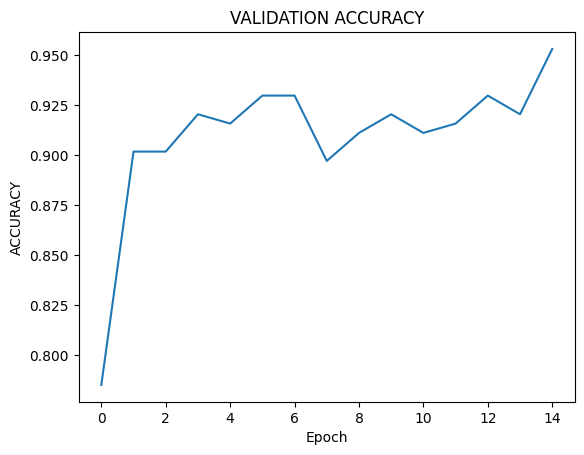

In [6]:
from IPython.display import Image
Image('/content/4.png')

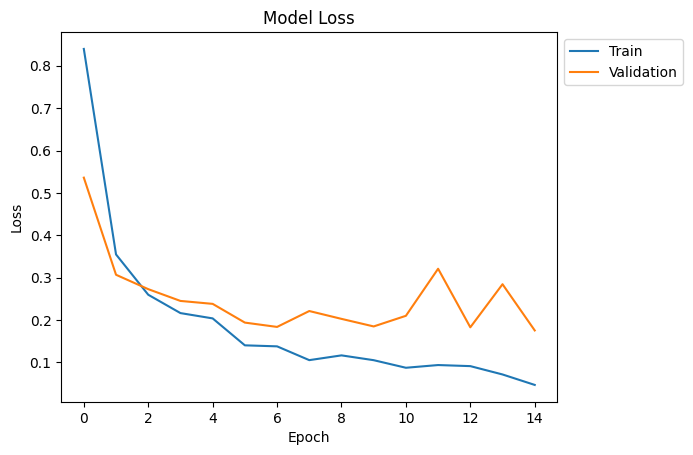

In [7]:
from IPython.display import Image
Image('/content/5.png')

Saving Model :

In [ ]:
#Save Model
model.save('DRP.h5')
!tar -zcvf DRP.tgz DRP.h5